<b>AML2019</b>

<h3>Challenge 3</h3>
<h1>Anomaly Detection (AD)</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>3<sup>th</sup> May 2019</i>

Anomaly detection (AD) refers to the process of detecting data points that do not conform with the rest of observations. Applications of anomaly detection include fraud and fault detection, surveillance, diagnosis, data cleanup, predictive maintenance.

When we talk about AD, we usually look at it as an unsupervised (or semi-supervised) task, where the concept of anomaly is often not well defined or, in the best case, just few samples are labeled as anomalous. In this challenge, you will look at AD from a different perspective!

The dataset you are going to work on consists of monitoring data generated by IT systems; such data is then processed by a monitoring system that executes some checks and detects a series of anomalies. This is a multi-label classification problem, where each check is a binary label corresponding to a specific type of anomaly. Your goal is to develop a machine learning model (or multiple ones) to accurately detect such anomalies.

This will also involve a mixture of data exploration, pre-processing, model selection, and performance evaluation. You will also be asked to try one or more rule learning models, and compare them with other ML models both in terms of predictive performances and interpretability. Interpreatibility is indeed a strong requirement especially in applications like AD where understanding the output of a model is as important as the output itself.

Please, bear in mind that the purpose of this challenge is not simply to find the best-performing model. You should rather make sure to understand the difficulties that come with this AD task.

# Overview
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the five following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from random import randint
    
from scipy.stats import norm
import scipy.ndimage





<div class="">
    <h3>1. Data Exploration</h3>
</div>

The first broad component of your notebook should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification.
Among others, this section should investigate:

- Data cleaning
- Data visualisation;
- Computing descriptive statistics, e.g. correlation.
- etc.

Data exploration is also useful to identify eventual errors in the dataset: for example, some features may have values that are outside the allowed range of values. Ranges are specified in the dataset description.

<h4>1. Loading the data </h4>

__COMMENTS:__

In this part we create our dataframe from our csv file. However we find that the column weren't well separated but have a 
delimiter ';', so when opening it we decided to split each column according to ';' and we rename all the columns thanks to list of features and the different labels we have

In [164]:
#Loading the data and splitting each column with ; 
data = pd.read_csv('/mnt/datasets/anomaly/data.csv' , sep=';')

In [165]:
data.head()

,0,0.1,16/01/2017 04:04,1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.17,0.18,0.19,0.20,0.21,nan.2,nan.3,0.22,0.23,0.24
0,1,1,06/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,2,1,20/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,3,2,13/02/2017 04:44,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,4,3,06/02/2017 04:31,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,5,4,06/02/2017 04:33,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [166]:
#Checking the shape is good (36 + 8 =44 labels)
print('The shape of our dataframe is ' , data.shape)

The shape of our dataframe is  (287030, 44)


In [167]:
#Creating the list of features and label to rename our dataframe
column_names = ['SessionNumber', 'SystemID' , 'Date' , 'HighPriorityAlerts' , 'Dumps' , 'CleanupOOMDumps' , 'CompositeOOMDums', 'IndexServerRestarts'
            , 'NameServerRestarts' , 'XSEngineRestarts' ,'PreprocessorRestarts' , ' DaemonRestarts'  , 'StatisticsServerRestarts' , 'CPU', 'PhysMEM', 'InstanceMEM',
                'TablesAllocation', 'IndexServerAllocationLimit','ColumnUnloads','DeltaSize','MergeErrors','BlockingPhaseSec',
                'Disk' ,'LargestTableSize', 'LargestPartitionSize','DiagnosisFiles','DiagnosisFilesSize','DaysWithSuccessfulDataBackups', 'DaysWithSuccessfulLogBackups',
                'DaysWithFailedDataBackups','DaysWithFailedfulLogBackups','MinDailyNumberOfSuccessfulDataBackups' ,'MinDailyNumberOfSuccessfulLogBackups','MaxDailyNumberOfFailedDataBackups',
                'MaxDailyNumberOfFailedLogBackups','LogSegmentChange' , 'Label1','Label2','Label3','Label4','Label5','Label6','Label7','Label8']

data.columns = column_names

In [168]:
data.head()

,SessionNumber,SystemID,Date,HighPriorityAlerts,Dumps,CleanupOOMDumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,...,MaxDailyNumberOfFailedLogBackups,LogSegmentChange,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8
0,1,1,06/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,2,1,20/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,3,2,13/02/2017 04:44,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,4,3,06/02/2017 04:31,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,5,4,06/02/2017 04:33,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


<h4>2. Cleaning the Data</h4>

In [169]:
#Drop the session number
data = data.drop('SessionNumber', axis=1)
data.head()

,SystemID,Date,HighPriorityAlerts,Dumps,CleanupOOMDumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,PreprocessorRestarts,...,MaxDailyNumberOfFailedLogBackups,LogSegmentChange,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8
0,1,06/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,1,20/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,2,13/02/2017 04:44,1,0.0,0.0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,3,06/02/2017 04:31,1,0.0,0.0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,4,06/02/2017 04:33,1,0.0,0.0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


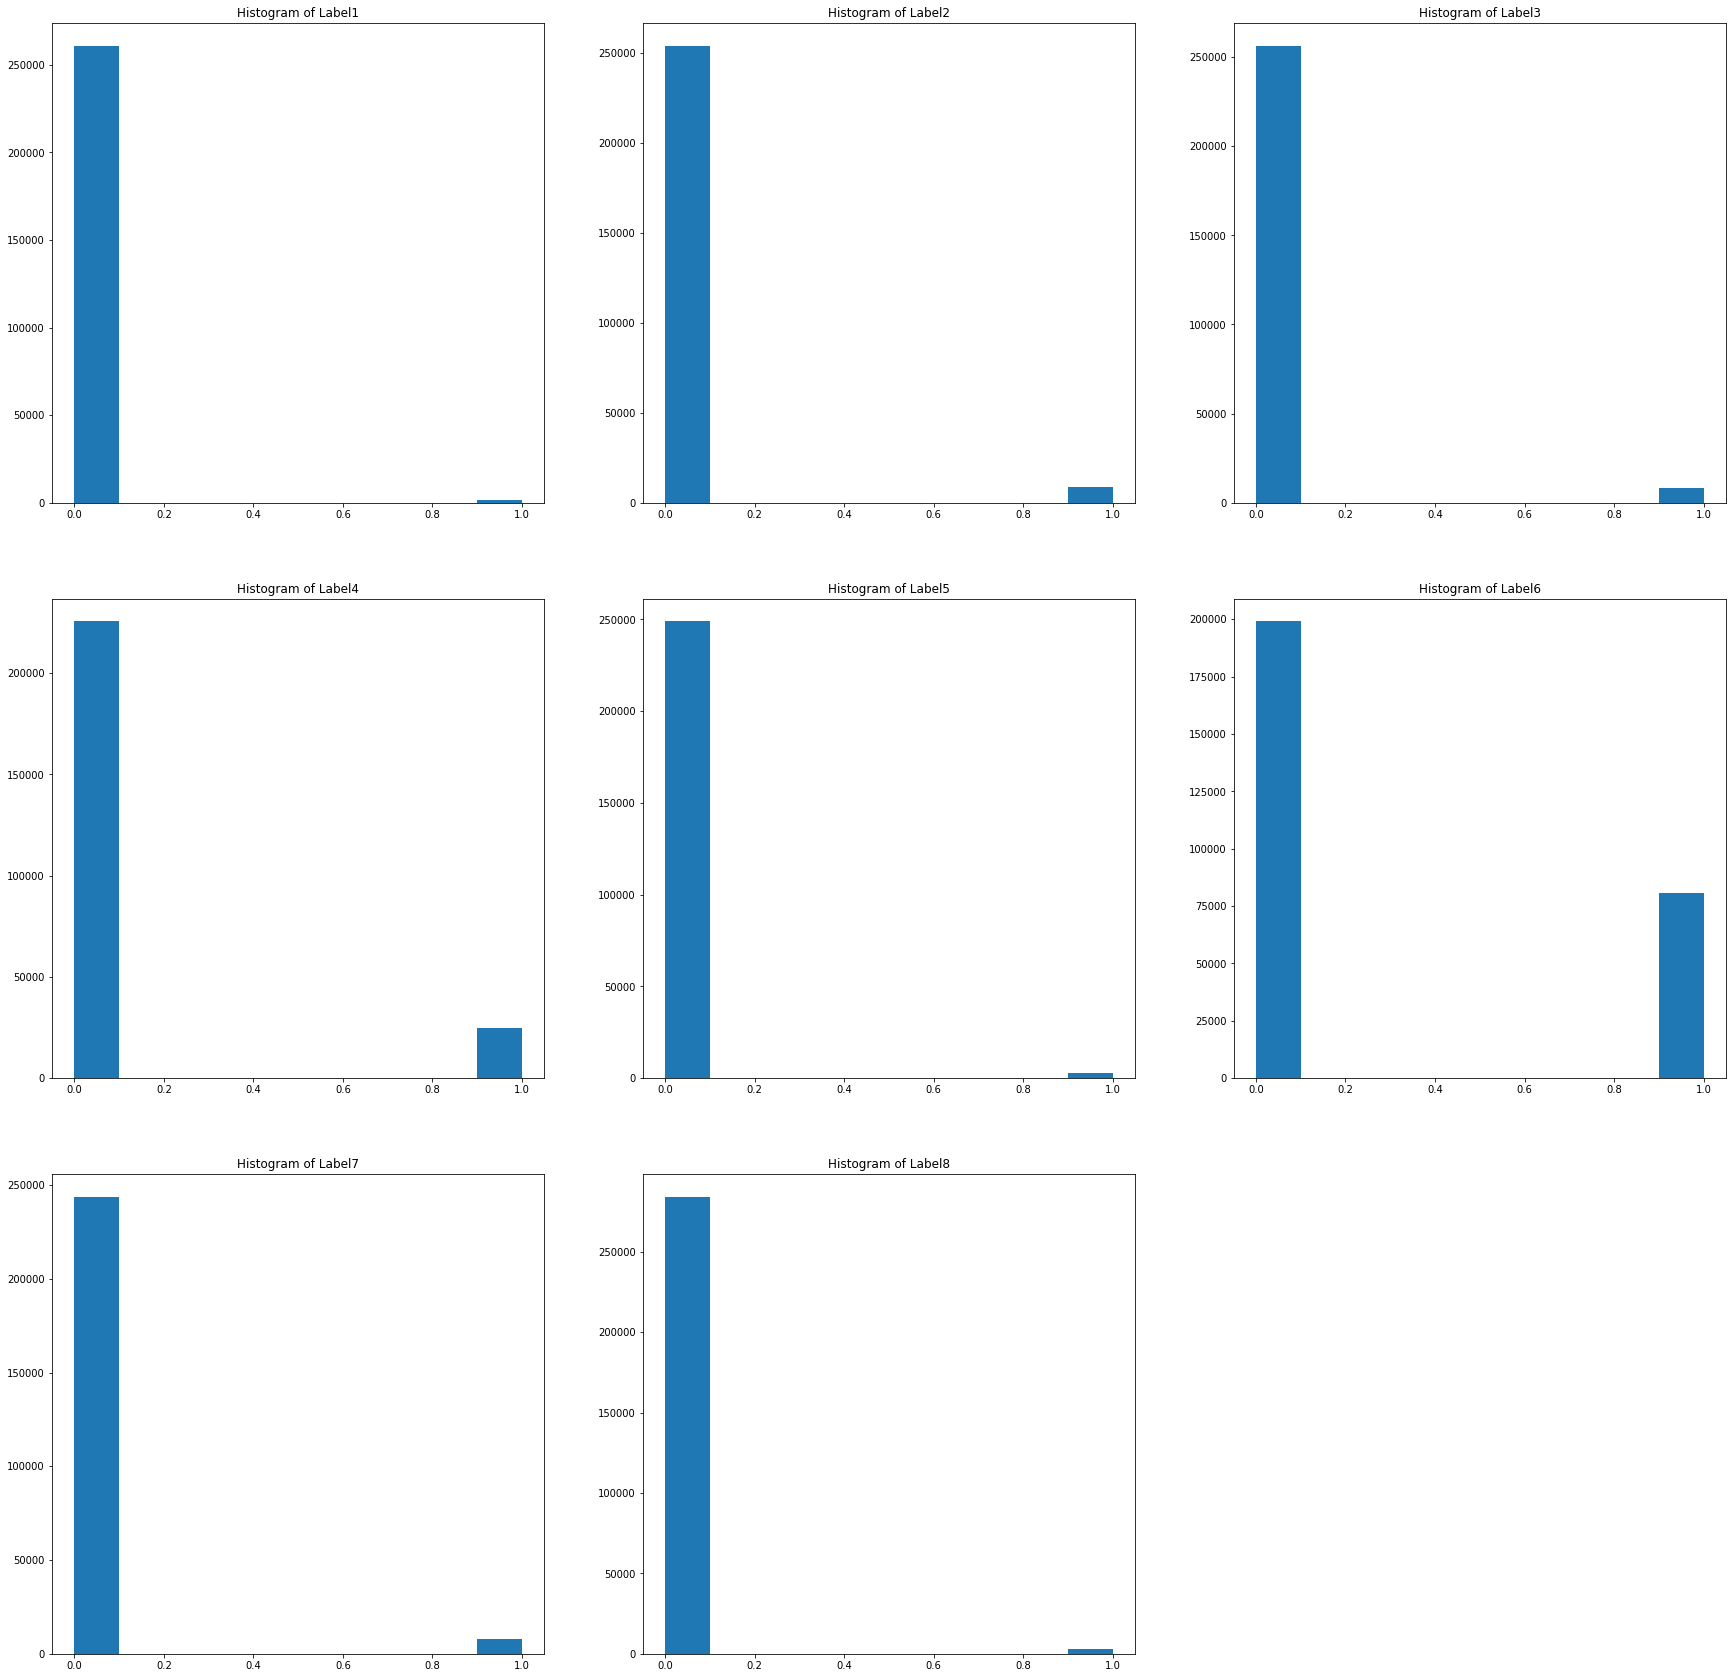

In [170]:
#Show the distribution of checks
fig = plt.figure(1, figsize=(30,30 ))
#Plotting the histogram of each label to see the global distribution of each label accross the training set and plotting n.a
for i in range(1,9):
    plt.subplot(3,3,i)
    number = ('Label'+str(i))
    plt.title('Histogram of ' + number)
    plt.hist(data[number].dropna())

In [171]:
#Printing null value percentage
null_columns=data.columns[data.isnull().any()]
null_columns = (data[null_columns].isnull().sum() * 100 / data.shape[0]  )
print(null_columns)

Dumps                          0.001045
CleanupOOMDumps                0.001045
CompositeOOMDums               0.001045
CPU                            8.782706
PhysMEM                        7.165453
InstanceMEM                    7.705466
TablesAllocation               0.797826
IndexServerAllocationLimit     9.212626
DeltaSize                      0.071770
MergeErrors                    2.694143
BlockingPhaseSec              26.426854
Disk                           3.964394
LargestTableSize               5.661429
LargestPartitionSize           0.052259
DiagnosisFiles                 7.637878
DiagnosisFilesSize             7.637878
LogSegmentChange              12.385117
Label1                         8.539525
Label2                         8.530816
Label3                         7.862593
Label4                        12.767307
Label5                        12.205344
Label6                         2.572553
Label7                        12.445389
Label8                         0.018117


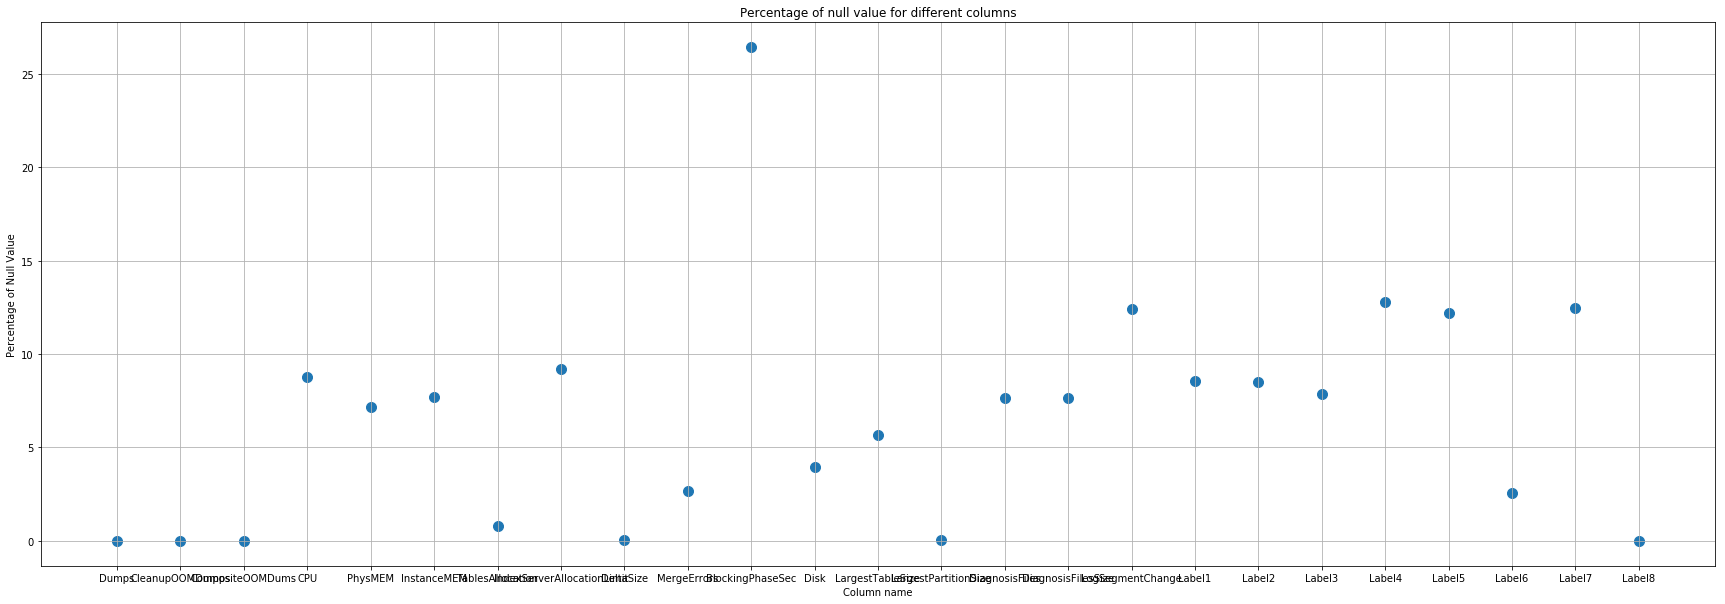

In [172]:
#Check the percentage of null value in each column
fig = plt.figure(1, figsize=(30,10 ))
plt.grid()
plt.title('Percentage of null value for different columns')
plt.xlabel('Column name')
plt.ylabel('Percentage of Null Value')
plt.scatter(list(null_columns.index.values)  , null_columns , s=100)

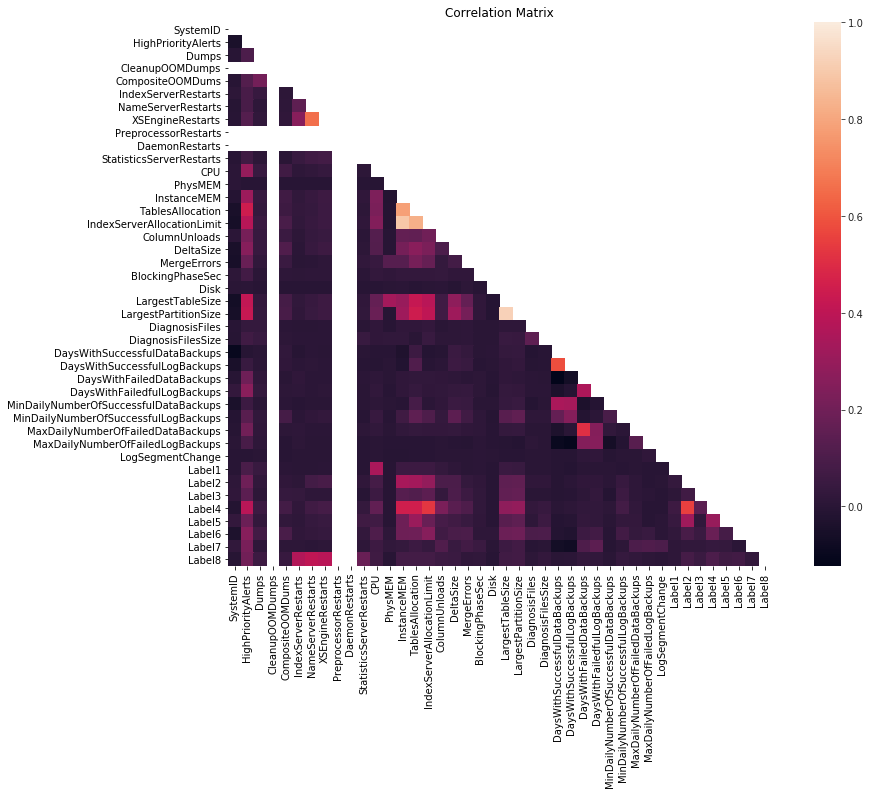

In [173]:
#Plotting the correlation matrix to see how each parameters is related to the checks
fig = plt.figure(1, figsize=(15,10))
correlation_matrix = data.corr()
plt.title('Correlation Matrix')
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(correlation_matrix, mask=mask, square=True)

In [174]:
#Printing the 6 more correlated feature for each label
for i in range(1,9):
    print('The most correlated value for Label' + str(i))
    print (correlation_matrix['Label' + str(i)].sort_values(ascending=False)[:6], '\n')

The most correlated value for Label1
Label1                1.000000
CPU                   0.347837
HighPriorityAlerts    0.092195
Label4                0.057411
TablesAllocation      0.055434
InstanceMEM           0.054811
Name: Label1, dtype: float64 

The most correlated value for Label2
Label2                        1.000000
Label4                        0.551382
InstanceMEM                   0.345691
TablesAllocation              0.332911
Label5                        0.322680
IndexServerAllocationLimit    0.291908
Name: Label2, dtype: float64 

The most correlated value for Label3
Label3                        1.000000
LargestPartitionSize          0.168906
LargestTableSize              0.161782
IndexServerAllocationLimit    0.146278
Label4                        0.143310
HighPriorityAlerts            0.142066
Name: Label3, dtype: float64 

The most correlated value for Label4
Label4                        1.000000
Label2                        0.551382
IndexServerAllocationLimit 

<div class="">
    <h3>2. Data Pre-processing</h3>
</div>

The previous step should give you a better understanding of which pre-processing is required for the data.
This may include:

- Normalising and standardising the given data;
- Removing outliers;
- Carrying out feature selection;
- Handling missing information in the dataset;
- Handling errors in the dataset;
- Combining existing features.

<h4> 1. Handling Missing Information in the dataset <h4/>

BlockingPhaseSec              26.426854
Label4                        12.767307
Label7                        12.445389
LogSegmentChange              12.385117
Label5                        12.205344
IndexServerAllocationLimit     9.212626
CPU                            8.782706
Label1                         8.539525
Label2                         8.530816
Label3                         7.862593
InstanceMEM                    7.705466
DiagnosisFiles                 7.637878
DiagnosisFilesSize             7.637878
PhysMEM                        7.165453
LargestTableSize               5.661429
Disk                           3.964394
MergeErrors                    2.694143
Label6                         2.572553
TablesAllocation               0.797826
DeltaSize                      0.071770
LargestPartitionSize           0.052259
Label8                         0.018117
Dumps                          0.001045
CleanupOOMDumps                0.001045
CompositeOOMDums               0.001045


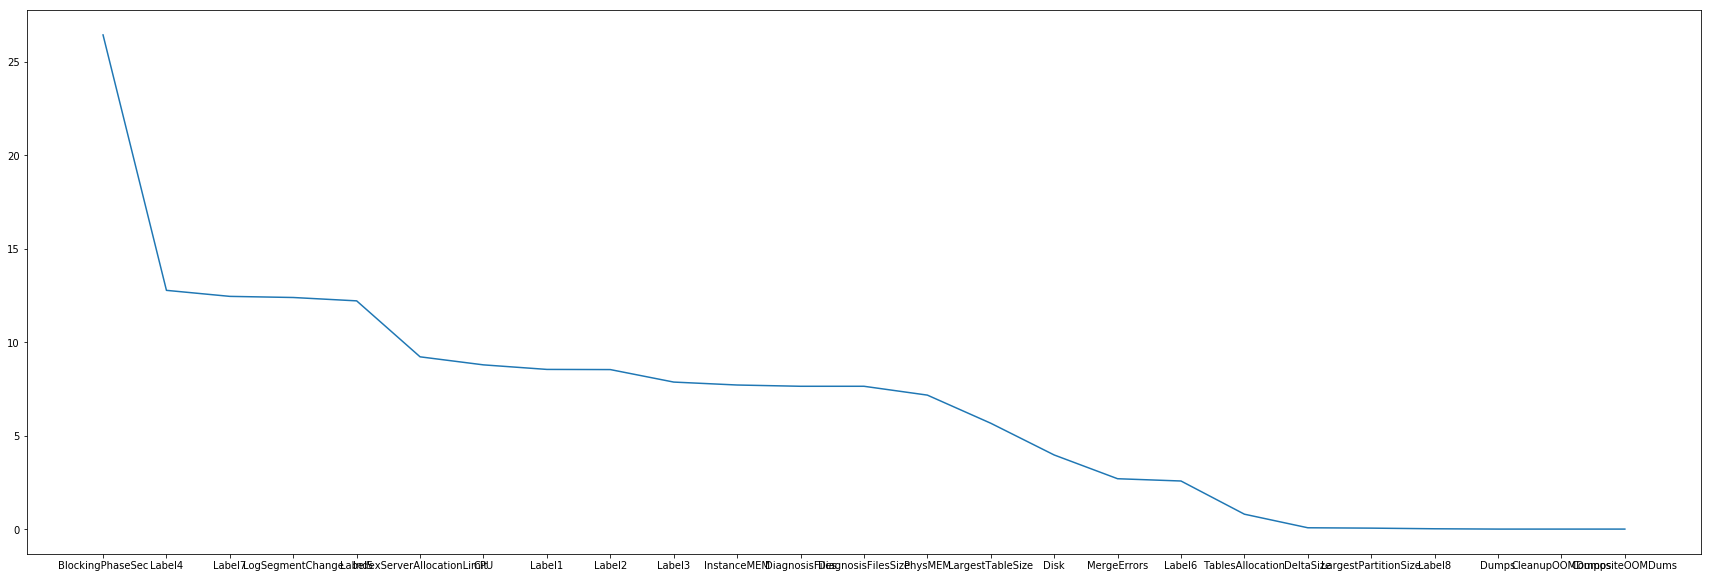

In [175]:
#Finding which column has NaN value to replace them  
fig = plt.figure(1, figsize=(30,10 ))
plt.plot(data.isnull().sum().sort_values(ascending= False)[:25] / data.shape[0]*100)
print(data.isnull().sum().sort_values(ascending = False)[:25]  / data.shape[0]*100)

In [176]:
#Dropping this column
data.BlockingPhaseSec.describe()
data = data.drop(['BlockingPhaseSec'] , axis=1)
data = data.drop('SystemID' , axis=1)

Label4                           12.767307
Label7                           12.445389
LogSegmentChange                 12.385117
Label5                           12.205344
IndexServerAllocationLimit        9.212626
CPU                               8.782706
Label1                            8.539525
Label2                            8.530816
Label3                            7.862593
InstanceMEM                       7.705466
DiagnosisFiles                    7.637878
DiagnosisFilesSize                7.637878
PhysMEM                           7.165453
LargestTableSize                  5.661429
Disk                              3.964394
MergeErrors                       2.694143
Label6                            2.572553
TablesAllocation                  0.797826
DeltaSize                         0.071770
LargestPartitionSize              0.052259
Label8                            0.018117
Dumps                             0.001045
CleanupOOMDumps                   0.001045
CompositeOO

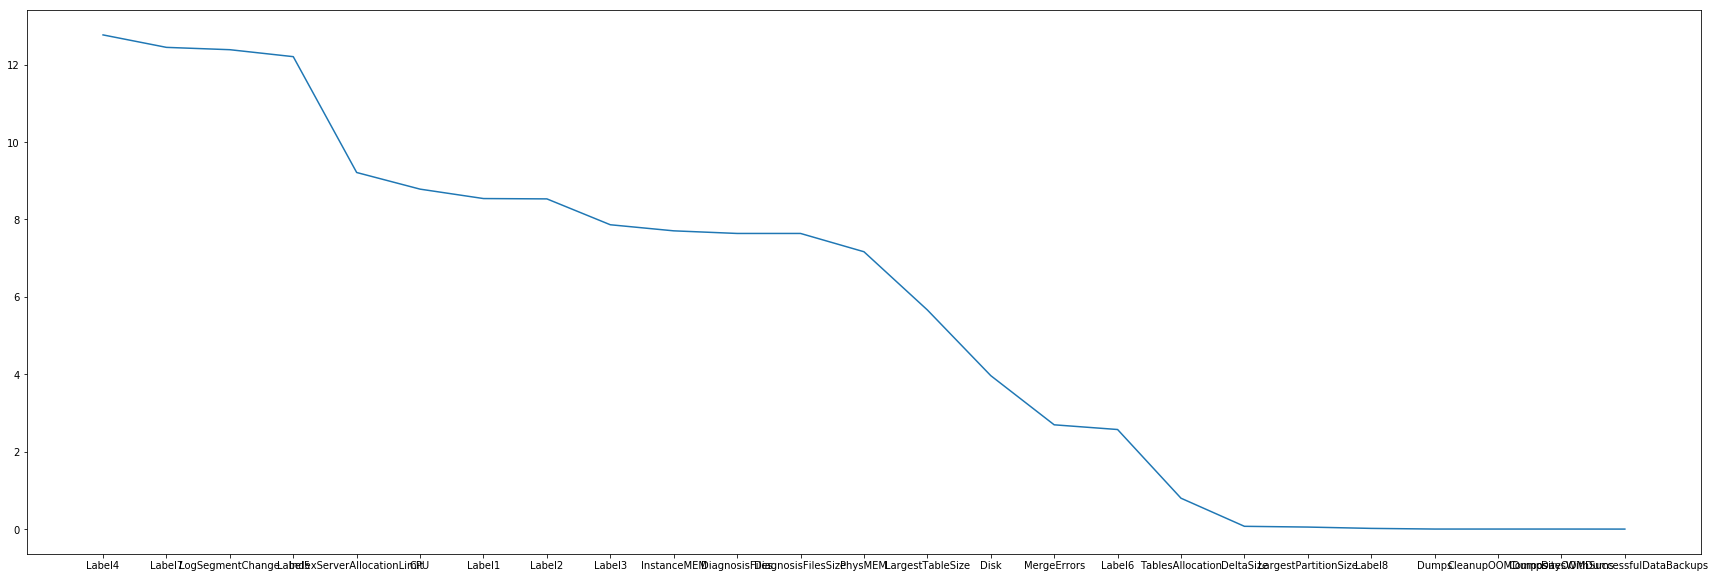

In [178]:
#Finding which column has NaN value to replace them  
fig = plt.figure(1, figsize=(30,10 ))
plt.plot(data.isnull().sum().sort_values(ascending= False)[:25] / data.shape[0]*100)
print(data.isnull().sum().sort_values(ascending = False)[:25]  / data.shape[0]*100)

In [179]:
data.LogSegmentChange.describe()

count    251481.000000
mean          1.326029
std         119.418416
min      -16887.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       10084.000000
Name: LogSegmentChange, dtype: float64

In [180]:
#Dropping Negative Value as LogSegmentChange is positive it is an error
data = data[(data['LogSegmentChange'] >= 0) | (data['LogSegmentChange'].isnull())]

data.LogSegmentChange.describe()

count    245811.000000
mean          4.551782
std          69.315859
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       10084.000000
Name: LogSegmentChange, dtype: float64

In [181]:
#Priting the new shape after we've dropped some rows containing error in the dataset
print(data.shape)

(281360, 42)


In [182]:
column_w_null_value =[ 'LogSegmentChange' , 'IndexServerAllocationLimit','CPU', 'InstanceMEM','DiagnosisFiles','DiagnosisFilesSize','PhysMEM','LargestTableSize',
'Disk' , 'MergeErrors','TablesAllocation','DeltaSize','LargestPartitionSize','CompositeOOMDums' , 'Dumps' , 'CleanupOOMDumps']   

for column in column_w_null_value:
    data[column] = data[column].fillna(data[column].mode()[0])



In [183]:
print(data.isnull().sum().sort_values(ascending = False)[:25]  / data.shape[0]*100)

Label4                        12.899133
Label7                        12.692991
Label5                        12.328334
Label1                         8.693844
Label2                         8.679272
Label3                         8.007179
Label6                         2.623685
Label8                         0.018126
XSEngineRestarts               0.000000
InstanceMEM                    0.000000
PhysMEM                        0.000000
CPU                            0.000000
StatisticsServerRestarts       0.000000
 DaemonRestarts                0.000000
PreprocessorRestarts           0.000000
CompositeOOMDums               0.000000
NameServerRestarts             0.000000
IndexServerRestarts            0.000000
IndexServerAllocationLimit     0.000000
CleanupOOMDumps                0.000000
Dumps                          0.000000
HighPriorityAlerts             0.000000
Date                           0.000000
TablesAllocation               0.000000
Disk                           0.000000


In [184]:
#If NaN value in a Label, we take  drop it because we don't know if anomaly or not
data = data.dropna()

In [185]:
#Checking there is no more NaN value
print(data.isnull().sum().sort_values(ascending = False)[:25]  / data.shape[0]*100)

Label8                        0.0
 DaemonRestarts               0.0
DeltaSize                     0.0
ColumnUnloads                 0.0
IndexServerAllocationLimit    0.0
TablesAllocation              0.0
InstanceMEM                   0.0
PhysMEM                       0.0
CPU                           0.0
StatisticsServerRestarts      0.0
PreprocessorRestarts          0.0
Label7                        0.0
XSEngineRestarts              0.0
NameServerRestarts            0.0
IndexServerRestarts           0.0
CompositeOOMDums              0.0
CleanupOOMDumps               0.0
Dumps                         0.0
HighPriorityAlerts            0.0
Date                          0.0
MergeErrors                   0.0
Disk                          0.0
LargestTableSize              0.0
LargestPartitionSize          0.0
Label6                        0.0
dtype: float64


<h4> 2. Feature Selection <h4/>

In [186]:
#Priting the different values in the column full blank
print((data['CleanupOOMDumps'].value_counts()/data['CleanupOOMDumps'].count())*100)

print((data['PreprocessorRestarts'].value_counts()/data['PreprocessorRestarts'].count())*100)

print((data[' DaemonRestarts'].value_counts()/data[' DaemonRestarts'].count())*100)

#Dropping this value as they are all the same so they are useless
data = data.drop(['CleanupOOMDumps' , 'PreprocessorRestarts' ,' DaemonRestarts' ] , axis=1)

data.head()

0.0    100.0
Name: CleanupOOMDumps, dtype: float64
0    100.0
Name: PreprocessorRestarts, dtype: float64
0    100.0
Name:  DaemonRestarts, dtype: float64


,SystemID,Date,HighPriorityAlerts,Dumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,StatisticsServerRestarts,CPU,...,MaxDailyNumberOfFailedLogBackups,LogSegmentChange,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8
73,15,16/01/2017 04:33,3,0.0,0.0,0,0,0,0,3.43,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,16,16/01/2017 04:19,0,0.0,0.0,0,0,0,0,3.33,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,17,16/01/2017 04:35,1,0.0,0.0,0,0,0,0,0.90,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,18,16/01/2017 04:46,3,0.0,0.0,0,0,0,0,1.30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,19,16/01/2017 04:27,4,0.0,0.0,0,0,0,0,1.05,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
data = data.drop(['Date'] , axis=1)

<h4> 3. Normalisation<h4/>

In [188]:
#After having delete null and non numerical values our aim is to standardizing the data to make our program more usefull to ML programm

#Normalising and standardising the given data by using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


#Getting the list of column
col_train = list(data.columns)



#Creating the matrixs based on the dataset to realise the normalization
mat_train = np.matrix(data)


#Realising the different fitting operations

#Fitting operation to normalize the train matrix
prepro = MinMaxScaler()
prepro.fit(mat_train)

#Realising the transformation from matrix to pd.df 
data = pd.DataFrame(prepro.transform(mat_train),columns = col_train)




0    0.005207
1    0.005050
2    0.001227
3    0.001856
4    0.001463
Name: CPU, dtype: float64


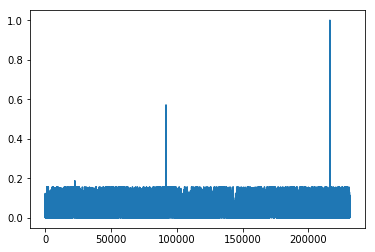

In [189]:
#Plot to see normalisation
print(data.CPU.head())
plt.plot(data.CPU)

   <h4>4. Removing Outliers</h4>

__In this part we are interesting into deleting outliers. However, we wonder if it is usefull to do it because outliers allow to detect anomaly we believe. So in this cell, we just try to prove that we shouldn't do it, and we don't use it finally.__

In [190]:
#The aim of this cell is to delete outliers thanks to the API IsolationForest
from sklearn.ensemble import IsolationForest

print('The shape of our train set before removing outliers is ' , data.shape)

#Removing outliers thanks to isolation forest
clf = IsolationForest(max_samples = 100, random_state = 5)
clf.fit(data)

#List where if outlier value is = -1
outliers = clf.predict(data)

#reorganising our list
outliers = pd.DataFrame(outliers, columns = ['IsOutlier'])

#outliers list to check the value
outlier_df = data.iloc[outliers[outliers['IsOutlier'] == -1].index.values]


#Delete the rows containing this outliers
data_without_outliers = data.iloc[outliers[outliers['IsOutlier'] == 1].index.values]


print("Number of Outliers:", outliers[outliers['IsOutlier'] == -1].shape[0])
#print("Number of rows without outliers:", data_without_outliers[0])

print('The shape of our train set after removing outliers is ' , data_without_outliers.shape)

The shape of our train set before removing outliers is  (231334, 38)
Number of Outliers: 23134
The shape of our train set after removing outliers is  (208200, 38)


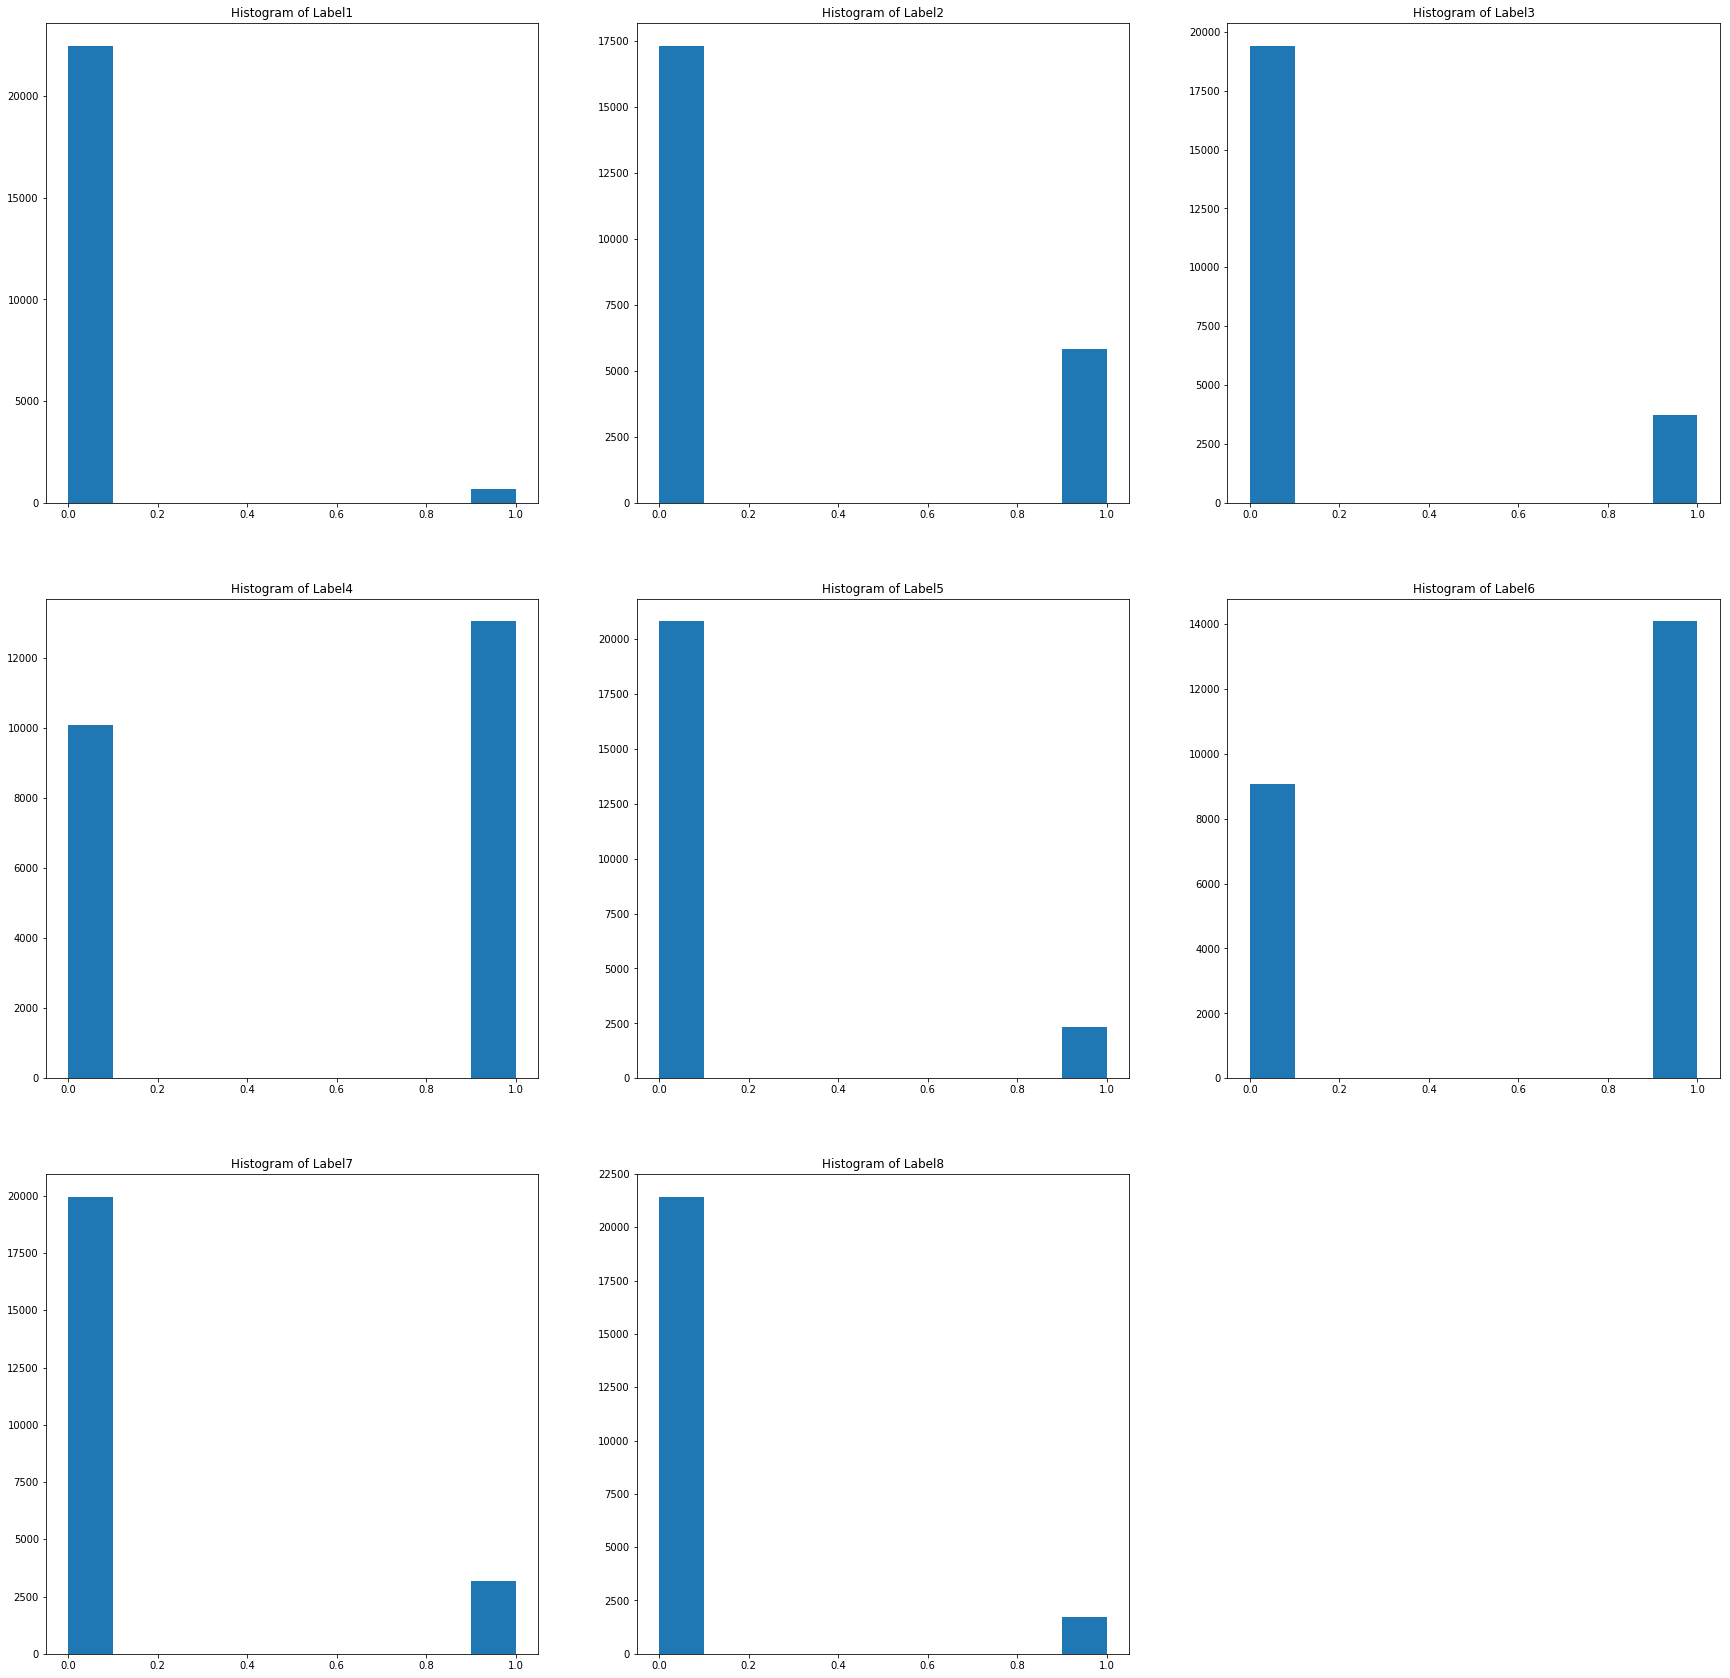

In [191]:
fig = plt.figure(1, figsize=(30,30))
#Plotting the histogram of each label to see the global distribution of each label accross the training set and plotting n.a
for i in range(1,9):
    plt.subplot(3,3,i)
    number = ('Label'+str(i))
    plt.title('Histogram of ' + number)
    plt.hist(outlier_df[number].dropna())

__COMMENT ON REMOVING OUTLIERS__: 


As we can see on the cell above, there is no point of deleting outliers in Anommaly detection because, if we suppress outliers we delete a lot of anomaly case so the data which is interesting for us.

__As a result, we decided to not delete the outliers and the result are way beter without deleting it__

<div class="">
    <h3>3. Model Selection</h3>
</div>

At this point, you should have a good understanding of the dataset, and have an idea about the possible candidate models. For example, you may try a multi-label classification model to predict all classes at ones, or train different models, one for each label. In any case, it is important to justify your choices and make a comparison among the candidate models.

You are free to choose any model you want, but you should be aware about some factors which may influence your decision:

- What is the model's complexity?
- Is the model interpretable?
- Is the model able to handle imbalanced datasets?
- Is the model capable of handling both numerical and categorical data?
- Is the model able to handle missing values?
- Does the model return uncertainty estimates along with predictions?

An in-depth evaluation of competing models in view of this and other criteria will elevate the quality of your submission and earn you a higher grade. You may also try to build new labels by combining one or more labels (for example by doing an OR) and check if this impacts the performance of the model(s).

In [85]:
#Splitting the dataframe into check and train part
train = data[data.columns[0:30]]
label = data[data.columns[30:38]] 


from sklearn.model_selection import train_test_split
#Splitting between test and training data
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42 ,)

<div class="">
    <h4>3.1 Interpretable Models</h3>
</div>

Being able to understand the output of a model is important in many field, especially in anomaly detection. In linear regression, for example, the weights of the model can provide some hints on the importance of features, and this is a form of interpretability. Here, we focus on Rule learning, a specific field of interpretable machine learning that provides interpretability through the use of rules. Examples of rule-based models are: 

- RIPPER
    - [Main Paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.107.2612&rep=rep1&type=pdf)
    - A fast and reliable implementation is JRIP by [WEKA](https://www.cs.waikato.ac.nz/~ml/weka/). You can also find unofficial python implementations on GitHub.
- Bayesian Rule Sets (BRS)
    - [Main Paper](http://jmlr.org/papers/volume18/16-003/16-003.pdf)
    - You can find a good implementation [here](https://pypi.org/project/ruleset/). You will probably need to install "fim" (pip install fim) before installing BRS.
- Scalable Bayesian Rule Lists (SBRL)
    - [Main Paper](https://arxiv.org/pdf/1602.08610.pdf)
    - You can find a good implementation [here](https://github.com/myaooo/pysbrl). You will probably need to install "fim" (pip install fim) before installing SBRL.
- and so on... 

Try to run at least one of the suggested models (you are free to try others as well) and comment:

- Are rule-learning models able to provide the same predictive performances as previously tested models?
- Are they faster or slower to train?
- Do learned rules look meaningful to you?
- How many rules do these models learn?
- How many conditions/atoms have on average?

<b>N.B.</b> Since most of the rule-learning implementations deal with binary labels, you can train the model to predict one label of your choice.

<h5> 3.1.1 Classical Decision TREE<h5/>

- What is the model complexity ?


This model of the classical decision tree isn't very complex. Indeed, it is easy to train because it requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values. Furthermore it is Simple to understand and to interpret. Trees can be visualised. Lastly the cost to run a prediction is logarithmic with the number of data points.

- Is this model interpretable?

For sure, this is one of the main strength of the decision tree, you can visualize the rules which the modul graphviz and go down the model to find how the classfication is done. However, in our case the tree is very big as you will see above and it will be difficult to plot it in a proper way.

- Is the model capable to manage imbalanced data?

Not really suited to this task because decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

- Is the model capable of handling both numerical and categorical data?

Yes Decision tree are able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable.


- Is the model able to handle missing values?

Even if it requires low data preparation it doesn't supportable missing values


- Does the model return uncertainty estimates along with predictions?

No

In [30]:
!pip3 install  --user 'graphviz'
!pip3 install  --user 'pydotplus'

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [71]:
import time
from sklearn import tree
from sklearn.metrics import f1_score

#Training Random forest on 500 data
begin = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[:500],y_train[:500])
print('It took' , time.time() - begin , 'seconds to train')

#Testing
y_pred = clf.predict(X_test)
print(y_pred)


f1_score(y_test, y_pred, average='micro')

It took 0.020854949951171875 seconds to train
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


0.8351334905301588

In [72]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


export_graphviz(clf, out_file='dtree.dot',  
                filled=True, rounded=True,
                special_characters=True)


<h4> Discovering the models above <h4/>

__What is rule-learning?__

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.[1] This rule-based approach also generates new rules as it analyzes more data. The ultimate goal, assuming a large enough dataset, is to help a machine mimic the human brain’s feature extraction and abstract association capabilities from new uncategorized data.

### <h5> 3.1.2 RIPPER <h5/>

__ATTENTION__:

We choose the implementation of this github : https://github.com/imoscovitz/wittgenstein

However, it doesn't work on python 3.5 but it works on more than 3.6. In order to run it I run it on my laptop and copypast the corresponding celle to be able to show examples of RIPPLE.

- Are rule-learning models able to provide the same predictive performances as previously tested models?

We tried on a reduce dataset and to show the test on the label6 which is the one with more anomalies than others.


- Are they faster or slower to train?

The model RIPPER is slower to train than the Decision Tree and the BRS for instance or random forest which are very fast to train. Moreover, you need to train it on each label separatly compared to decision tree where you can pass all the labels as parameters.
The full time of training is about 1200 seconds (for just 500 examples) which is a lot so this model (or this specific implementation) is very computational demanding and not really interesting

- Do learned rules look meaningful to you?

The implementation we took on the github returns some understandable and less understandable rules. For instance, if we print the ruleset and refer to the corresponding documentation:  ruleset is a disjunction of conjunctions -- 'V' represents 'or'; '^' represents 'and'. In other words, the model predicts positive class if any of the inner-nested condition-combinations are all true.
If we take the 6th rules, corresponding to label 6, the label6 which has the more errors we can read: 
<Ruleset object: [DiagnosisFilesSize=0.0-0.01] V [HighPriorityAlerts=0.25-0.42] V [IndexServerAllocationLimit=0.75-0.86^SystemID=0.05-0.08]>
This means label6 is true if one of this 3 conditions is true.

- How many rules do these models learn?

Our model learn one rules per training, and a rull is a combition of disjunction of conjunctions of 'or'/ 'and'

- How many conditions/atoms have on average?

This depends on the dataset, as it takes a long time to train we have fery few conditions.

In [12]:
import time
import warnings
warnings.filterwarnings("ignore")

ruleset_list =[]
score_list = []

start = time.time()
#for each check we train it
for label in (list(y_test)):
    
    print('Classficiation on ' ,label)
    
    #Initialising RIPPER
    ripper_clf= lw.RIPPER()
    
    #Training it
    ripper_clf.fit(X_train , y_train[label])
    ruleset_list.append(ripper_clf.ruleset_)

    del ripper_clf
print('It takes ' , time.time()-start, 'seconds to execute')


Classficiation on  Label1
Classficiation on  Label2
Classficiation on  Label3
Classficiation on  Label4
Classficiation on  Label5
Classficiation on  Label6
Classficiation on  Label7
Classficiation on  Label8
It takes  1296.76083445549 seconds to execute


In [13]:
print(ruleset_list)

[<Ruleset object: >, <Ruleset object: [CPU=0.0-0.0]>, <Ruleset object: [Label2=0.0]>, <Ruleset object: [HighPriorityAlerts=0.0-0.04] V [ColumnUnloads=0.0-0.0] V [DeltaSize=0.01-0.16]>, <Ruleset object: >, <Ruleset object: [DiagnosisFilesSize=0.0-0.01] V [HighPriorityAlerts=0.25-0.42] V [IndexServerAllocationLimit=0.75-0.86^SystemID=0.05-0.08]>, <Ruleset object: [MergeErrors=0.0]>, <Ruleset object: [NameServerRestarts=0.0]>]


In [14]:
#Testing it on one label
ripper_clf= lw.RIPPER()
ripper_clf.fit(X_train , y_train['Label6'])
y_pred = ripper_clf.predict(X_test)
score = (f1_score(y_test[label], y_pred, average='micro'))

In [15]:
print(score)

0.864


<h5> 3.1.3 BRS <h5/>

- What is BRS ?

It is a rule-machine learning algorithm, so its aim is to discover and identify relations and rules to be able to classify. This alogirthm is based on Bayesian science. 

- Are rule-learning models able to provide the same predictive performances as previously tested models?



- Are they faster or slower to train?

The model BRS is slower to train than the Decision Tree for instance or random forest which are very fast to train. Moreover, you need to train it on each label separatly compared to decision tree where you can pass all the labels as parameters.

- Do learned rules look meaningful to you?

The implementation we took on the github recommanded we don't manage to find the rules clearly defined. Indeed, unfortunatly this github recommanded doesn't explain well how to interpret what it returns.


- How many rules do these models learn?
Don't know

- How many conditions/atoms have on average?
Don't know

In [42]:
train = data[data.columns[0:30]]
label = data[data.columns[30:31]] 


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [79]:
##### import ruleset

X_train = X_train.astype(str)

y_train.astype(int)
y_train.head()



,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8
221577,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7606,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
193394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
import time
import ruleset
import warnings
warnings.filterwarnings("ignore")

X_test = X_test.astype(str)




start = time.time()
#for each  label predicting using BRS

for i in range(1,9):
    #Training on the label i
    print('Training on label ' + str(i))
    y_train_p = (y_train['Label'+ str(i)] == 1).as_matrix()
    model = ruleset.BayesianRuleSet(method='forest')
    model.fit(X_train[:500], y_train_p[:500])
    
    #Predicting on the label i
    y_pred = model.predict(X_test)
    y_test_p = (y_test['Label'+ str(i)] == 1).as_matrix()
    
    print('THE SCORE  IS FOR LABEL ' +str(i) , f1_score(y_pred , y_test_p ,average='micro'))

print('It took ' , time.time()- start, ' seconds to train')

Training on label 1

** chain = 1, max at iter = 0 ** 
 accuracy = 0.996, TP = 1,FP = 2, TN = 497, FN = 0
 old is -999999999.9, pt_new is -32.88963591619961, prior_ChsRules=-22.52638403698802, likelihood_1 = -8.576504951807124, likelihood_2 = -1.7867469274044652
 
['HighPriorityAlerts_0.20833333333333331', 'MinDailyNumberOfSuccessfulLogBackups_0.005449972051425378']
[679]
THE SCORE  IS FOR LABEL 1 0.9959791297688
Training on label 2

** chain = 1, max at iter = 0 ** 
 accuracy = 0.988, TP = 1,FP = 3, TN = 493, FN = 3
 old is -999999999.9, pt_new is -53.80261373502344, prior_ChsRules=-22.52638403698802, likelihood_1 = -12.122283562280472, likelihood_2 = -19.15394613575495
 
['HighPriorityAlerts_0.125_neg', 'DiagnosisFiles_0.00030876152943620143']
[1780]
THE SCORE  IS FOR LABEL 2 0.989959791297688
Training on label 3

** chain = 1, max at iter = 0 ** 
 accuracy = 0.99, TP = 1,FP = 1, TN = 494, FN = 4
 old is -999999999.9, pt_new is -59.44781795633298, prior_ChsRules=-30.644929569214582, 

The aim of this algorithm according to the paper on it is to develop a rule learning alogrithm which can performs on large noisy dataset (what are all real dataset in general)

<div class="">
    <h4>3.2 Other Models</h3>
</div>

<h5>3.2.1 RandomForest Model</h5>


- What is the model's complexity?

Random forest is a technique based on Decision Tree Classfier that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. So the complexity is heavier than the one of the Decision Tree.

- Is the model interpretable?

This model isn't really interpretable however you can plot the trees

- Is the model able to handle imbalanced datasets?

No like for  decision tree learners, it creates biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.
However, the RandomForest algorithm is built to avoid overfitting.
 
- Is the model capable of handling both numerical and categorical data?

Yes like decision tree

- Is the model able to handle missing values?

No like decision tree

- Does the model return uncertainty estimates along with prediction?

No

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Trying to use random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=15 , random_state=0)
clf.fit(X_train ,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [218]:
#Testing it 
y_pred = clf.predict(X_test)
y_pred

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [219]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9411152415713137

<h5>3.2.2 Neural NetWork Model</h5>


In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [90]:
#Building a neural network with tensorFlow and keras
def build_model():
    model = keras.Sequential([
    layers.Dense(200, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),   
    layers.Dense(25, activation=tf.nn.relu), 
    layers.Dense(12, activation=tf.nn.relu),
  ])

    model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


  
#Showwing the characteristics
model = build_model()

model.summary()

#Function from tensorflow to show the evolution of the number of epochs
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 10


#fitting the model to our data
y_train_p = (y_train['Label6'] )
history = model.fit(
  X_train, y_train_p,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               6200      
_________________________________________________________________
dense_13 (Dense)             (None, 25)                5025      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 11,550
Trainable params: 11,550
Non-trainable params: 0
_________________________________________________________________

..........

,acc,loss,val_acc,val_loss,epoch
5,0.925543,0.177378,0.898031,0.208563,5
6,0.930043,0.165181,0.874278,0.372842,6
7,0.932453,0.158550,0.946540,0.132884,7
8,0.935105,0.152558,0.945302,0.125161,8
9,0.936801,0.147001,0.965342,0.101656,9


In [96]:
y_pred = model.predict(X_test)
#Rounding it to discretize our prediction
y_pred = y_pred.round()

f1_score(y_test.Label6 , y_pred , average='macro' )

0.9527173570802844

<h3> Which Model to choose ? <h3/>

So we tried several models (Tree, RandomTree, NN, RIPPER, RBL) and we have to do a selection.
    
We decided to choose the Random Forest Classifier. But why ?
    
- This model is interpetable 
    
Indeed, we can plot the tree and so it will be interpretable which is very important for anomaly detection as we can know exactly what is responsible for the anomaly. Indeed, Neural Network doesn't provide human readable rules and this is not really good for anomaly detection. 

- This model provides good results with a small computation time

Indeed, as we can see with have a good f1 score compared with other models, within 20seconds compared with other models which take more than 10 minutes to train which is a bit long for the same result.

- This model can analyse the 8 check at the same time

Indeed, appart from the Tree Classsfier all the other models need individual training for each label or check which is computationally worse and take more time.

-This model requires less data preparation
 
Indeed, even if we did data normalisation this is not really needed by our model. Furthermore we don't have to put the data in a particular format (just a dataframe is enough) compared with BRS which requires string for instance. 


More generally, random forest presents advantages among all other algorithms:
 - Whether you have a regression or classification task, random forest is an applicable model for your needs. It can handle binary features, categorical features, and numerical features. There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed.
 
 - They are parallelizable, meaning that we can split the process to multiple machines to run. This results in faster computation time. Boosted models are sequential in contrast, and would take longer to compute.
 
 - It is faster to train than decision trees because we are working only on a subset of features in this model, so we can easily work with hundreds of features. Prediction speed is significantly faster than training speed because we can save generated forests for future uses.
 
 - Each decision tree has a high variance, but low bias. But because we average all the trees in random forest, we are averaging the variance as well so that we have a low bias and moderate variance model.

<div class="">
    <h3>4. Parameter Optimisation</h3>
</div>

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning.
There are several techniques for carrying out such a procedure, including cross-validation, Bayesian optimisation, and several others.
As before, an analysis into which parameter tuning technique best suits your model is expected before proceeding with the optimisation of your model.

So we decided as you will see below to focus on Random Forest Classifier, so there are several parameters to optimize which are (with there default value) : 
- bootstrap=True,
- class_weight=None,
- criterion=’gini’,
- max_depth=None, 
- max_features=’auto’,
- max_leaf_nodes=None,
- min_impurity_split=1e-07, 
- min_samples_leaf=1,
- min_samples_split=2,
- min_weight_fraction_leaf=0.0,
- n_estimators=10, 
- n_jobs=1, 
- oob_score=False)

To choose the best parameters we will use the k cross validation techniques (https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833) from sklearn. The principe is simple : to find the best parameters we split our data in k fold, train on k-1 and then test on the last one and that for each different set of fold. Then ze compute the average of all score to keep the best parameters amoung all we have tested. What are the main advantages of k cross validation :
    - By splitting our data into three sets instead of two, we’ll tackle all the same issues we talked about before, especially if we don’t have a lot of data. By doing cross-validation, we’re able to do all those steps using a single set.


In [208]:
train = data[data.columns[0:30]]
label = data[data.columns[30:38]] 


from sklearn.model_selection import train_test_split
#Splitting between the test we won't use for training and the training
X, X_test, y, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

<h4> 1. Number of Estimator <h4/>

__COMMENTS:__

In this first part we'll focus on the number of estimators which corresponds according to the sklearn website to The number of trees in the forest.  Usually the higher the number of trees the better to learn the data. Here, we want to find a good balance between results and trainign time. 

Training with n_estimators =  1
Training with n_estimators =  2
Training with n_estimators =  4
Training with n_estimators =  8
Training with n_estimators =  16
Training with n_estimators =  32
Training with n_estimators =  64
Training with n_estimators =  100
Training with n_estimators =  200


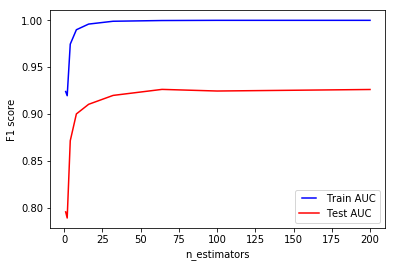

In [40]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

from sklearn.model_selection import KFold

#Number of splits 
n_split = 3
kf = KFold(n_splits=n_split) # Define the split  
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator

#Realising KCrossValidation for each parameter
for estimator in n_estimators:
    

    print('Training with n_estimators = ' , estimator)
    
    score_train = []
    score_test = []
    
    #Creating the different folds
    for train_index, test_index in kf.split(X):

        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
        
        #Training it on k-1 fold
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        score_train.append(f1_score(y_train, train_pred , average='macro' ))

        #Validation on 1 fold
        y_pred = rf.predict(X_val)
        score_test.append(f1_score(y_val, y_pred , average='macro' ))

    
    #Append the mean of the k combination
    train_results.append(np.mean(score_train))
    test_results.append(np.mean(score_test))
    
    

#Plotting the result for the different parameters
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('n_estimators')
plt.show()


__COMMENTS:__

As 

<h4> 2.Max depth <h4/>

Training with max_depth =  1.0
Training with max_depth =  2.0
Training with max_depth =  3.0
Training with max_depth =  4.0
Training with max_depth =  5.0
Training with max_depth =  6.0
Training with max_depth =  7.0
Training with max_depth =  8.0
Training with max_depth =  9.0
Training with max_depth =  10.0
Training with max_depth =  11.0
Training with max_depth =  12.0
Training with max_depth =  13.0
Training with max_depth =  14.0
Training with max_depth =  15.0
Training with max_depth =  16.0
Training with max_depth =  17.0
Training with max_depth =  18.0
Training with max_depth =  19.0
Training with max_depth =  20.0
Training with max_depth =  21.0
Training with max_depth =  22.0
Training with max_depth =  23.0
Training with max_depth =  24.0
Training with max_depth =  25.0
Training with max_depth =  26.0
Training with max_depth =  27.0
Training with max_depth =  28.0
Training with max_depth =  29.0
Training with max_depth =  30.0
Training with max_depth =  31.0
Training with max

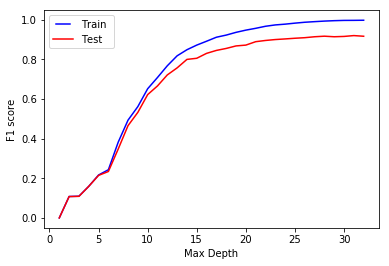

In [48]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

from sklearn.model_selection import KFold

#Number of splits 
n_split = 3
kf = KFold(n_splits=n_split) # Define the split  
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator

#Realising KCrossValidation for each parameter
for max_depth in max_depths:
    
    
    print('Training with max_depth = ' , max_depth)
    score_train = []
    score_test = []
    
    for train_index, test_index in kf.split(X):

        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


        rf = RandomForestClassifier(n_estimators=64 , max_depth=max_depth ,n_jobs=-1)
        
        #Training on k-1 fold
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        score_train.append(f1_score(y_train, train_pred , average='macro' ))

        #Predicting on the last fold
        y_pred = rf.predict(X_val)
        score_test.append(f1_score(y_val, y_pred , average='macro' ))

        #Append the mean of the k combination 
    train_results.append(np.mean(score_train))
    test_results.append(np.mean(score_test))
    
    
#Plotting the result for the different parameters
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train ')
line2, = plt.plot(max_depths, test_results, 'r', label='Test ')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('Max Depth')
plt.show()

__COMMENTS:__

So first what is Max depth : This is the maximum depth of the tree. The deeper the tree, the more splits it has and it captures more information about the data. However we must take care about not having to much depth because it will lead to OVERFITTING.

<h4> 3. Minimum number of split <h4/>

__COMMENTS:__

In the following cell we'll take care about the number of split which is The minimum number of samples required to split an internal node (If int, then consider min_samples_split as the minimum number)


Training with min_samples_splits =  2
Training with min_samples_splits =  3
Training with min_samples_splits =  4
Training with min_samples_splits =  5
Training with min_samples_splits =  6
Training with min_samples_splits =  7
Training with min_samples_splits =  8
Training with min_samples_splits =  9
Training with min_samples_splits =  10
Training with min_samples_splits =  11
Training with min_samples_splits =  12
Training with min_samples_splits =  13
Training with min_samples_splits =  14
Training with min_samples_splits =  15
Training with min_samples_splits =  16
Training with min_samples_splits =  17
Training with min_samples_splits =  18
Training with min_samples_splits =  19
Training with min_samples_splits =  20
Training with min_samples_splits =  21
Training with min_samples_splits =  22
Training with min_samples_splits =  23
Training with min_samples_splits =  24
Training with min_samples_splits =  25
Training with min_samples_splits =  26
Training with min_samples_splits 

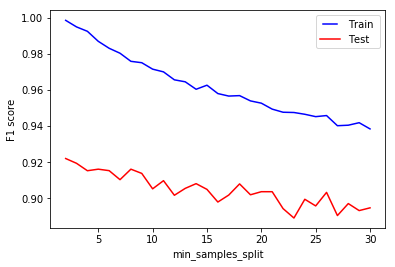

In [86]:
min_samples_splits = [int(i) for i in range (2 , 31) ]
train_results = []
test_results = []

from sklearn.model_selection import KFold

#Number of splits 
n_split = 3
kf = KFold(n_splits=n_split) # Define the split  
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator

#Realising KCrossValidation for each parameter
for min_samples_split in min_samples_splits:
    
    print('Training with min_samples_splits = ' , min_samples_split)    
    score_train = []
    score_test = []
    
    
    for train_index, test_index in kf.split(X):

        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        
        rf = RandomForestClassifier(n_estimators=64 , max_depth=32, min_samples_split=min_samples_split ,n_jobs=-1)
        
        #Training on k-1 fold
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        score_train.append(f1_score(y_train, train_pred , average='macro' ))

         #Predicting on the last fold
        y_pred = rf.predict(X_val)
        score_test.append(f1_score(y_val, y_pred , average='macro' ))
    
     #Append the mean of the k combination
    train_results.append(np.mean(score_train))
    test_results.append(np.mean(score_test))
    
    
 #Plotting the result for the different parameters   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train ')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test ')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('min_samples_split')
plt.show()

__COMMENTS:__

As we can see the better result is with 2. Indeed, We can see that when we require all of the samples at each node, the model cannot learn enough about the data. This is an underfitting case. Our model doesn't manage to learn well if we takea to much high parameter.

<h4> 4. min_samples_leaf <h4/>

__COMMENTS:__

In this cell we focus on the min_samples_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
This parameter is very similar to min_samples_splits but for the leaf

Training with min_samples_leafs =  2
Training with min_samples_leafs =  3
Training with min_samples_leafs =  4
Training with min_samples_leafs =  5
Training with min_samples_leafs =  6
Training with min_samples_leafs =  7
Training with min_samples_leafs =  8
Training with min_samples_leafs =  9
Training with min_samples_leafs =  10
Training with min_samples_leafs =  11
Training with min_samples_leafs =  12
Training with min_samples_leafs =  13
Training with min_samples_leafs =  14


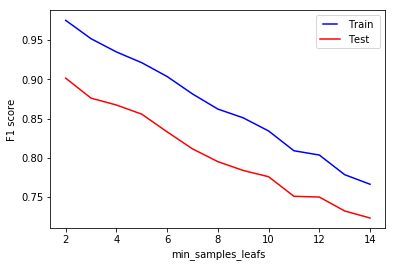

In [52]:
min_samples_leafs =[int(i) for i in range (2 , 15) ]
train_results = []
test_results = []

from sklearn.model_selection import KFold

#Number of splits 
n_split = 3
kf = KFold(n_splits=n_split) # Define the split  
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator

#Realising KCrossValidation for each parameter
for min_samples_leaf in min_samples_leafs:
    
     
    score_train = []
    score_test = []
    
    

    print('Training with min_samples_leafs = ' , min_samples_leaf)
    for train_index, test_index in kf.split(X):

        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        rf = RandomForestClassifier(n_estimators=64 , max_depth=32, min_samples_leaf=min_samples_leaf ,n_jobs=-1)
        
          #Training on k-1 fold
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        score_train.append(f1_score(y_train, train_pred , average='macro' ))

         #Predicting on the last fold
        y_pred = rf.predict(X_val)
        score_test.append(f1_score(y_val, y_pred , average='macro' ))
    
     #Append the mean of the k combination
    train_results.append(np.mean(score_train))
    test_results.append(np.mean(score_test))
    
    
#Plotting the result for the different parameters    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train ')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test ')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('min_samples_leafs')
plt.show()

__COMMENTS:__

As we can see the better result is with 2. Indeed, We can see that when if we all of the samples at each node, the model cannot learn enough about the data because it is too complicated. This is an underfitting case. Our model doesn't manage to learn well if we takea to much high parameter.

<h4> 5. Max_features <h4/>

Training with max_feature =  1
Training with max_feature =  2
Training with max_feature =  3
Training with max_feature =  4
Training with max_feature =  5
Training with max_feature =  6
Training with max_feature =  7
Training with max_feature =  8
Training with max_feature =  9
Training with max_feature =  10
Training with max_feature =  11
Training with max_feature =  12
Training with max_feature =  13
Training with max_feature =  14
Training with max_feature =  15
Training with max_feature =  16
Training with max_feature =  17
Training with max_feature =  18
Training with max_feature =  19
Training with max_feature =  20
Training with max_feature =  21
Training with max_feature =  22
Training with max_feature =  23
Training with max_feature =  24
Training with max_feature =  25
Training with max_feature =  26
Training with max_feature =  27
Training with max_feature =  28
Training with max_feature =  29


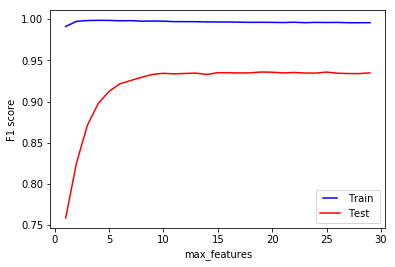

In [48]:
from sklearn.model_selection import KFold

#Number of splits 
n_split = 3
kf = KFold(n_splits=n_split) # Define the split  
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator


max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

#Realising KCrossValidation for each parameter
for max_feature in max_features:
    
    score_train = []
    score_test = []
    
    print('Training with max_feature = ' , max_feature)
    
    for train_index, test_index in kf.split(X):

        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


          #Training on k-1 fold
        rf = RandomForestClassifier(n_estimators=64 , max_depth=32, max_features=max_feature ,n_jobs=-1)
        rf.fit(X_train, y_train)  


        train_pred = rf.predict(X_train)
        score_train.append(f1_score(y_train, train_pred , average='macro' ))

         #Predicting on the last fold
        y_pred = rf.predict(X_val)
        score_test.append(f1_score(y_val, y_pred , average='macro' ))

        
     #Append the mean of the k combination
    train_results.append(np.mean(score_train))
    test_results.append(np.mean(score_test))
    
 #Plotting the result for the different parameters   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train ')
line2, = plt.plot(max_features, test_results, 'r', label='Test ')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max_features')
plt.show()


__COMMENTS:__

As we can see the result are increasing as we increase the number of features. However we overfit at about 10 features and the training time is increasing to with the number of features.
So we will chose 8 features to avoid overfitting but keep a short training time.

In [49]:
print(len(train_results))

29


<div class="">
    <h3>5. Model Evaluation</h3>
</div>

Some form of pre-evaluation will inevitably be required in the preceding sections in order to both select an appropriate model and configure its parameters appropriately.
In this final section, you may evaluate other aspects of the model such as:

- Assessing the running time of your model;
- Determining whether some aspects can be parallelised;
- Training the model with smaller subsets of the data.
- etc.

For the evaluation of the classification results, you should use F1-score for each class and do the average.

<b>N.B.</b> Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

__COMMENTS ON THE DISTRIBUTED/PARALLELISED PART__ :

So we see that our model demands a lot of computation time so we may think about a way to parralelize and distribute the computation across several machines (with Spark for instance) and the data across several machines with HDFS for instance.

So if our data is big, let's simply use the HDFS storage system to split the data across th different machine. Here there is no need to do that as the data is quiet small.

No, let's think about how to distribute the computation work across several machines. One way to do it is to split our model in several machines, it can be split across multiple machines. 
As random forest is based on the training of several trees followed by a vote we can decompose this training by a simple MAP-REDUCE framework. Each mapper is in charge of training one tree, and the reducers give the result of the vote. Each tree can be in charge of training with the data which is in the same machine to avoid network traffic

__TRAINING WILL SMALLER SUBSETS OF THE DATA__

training with datasize of  0.01
training with datasize of  0.1
training with datasize of  0.2
training with datasize of  0.3
training with datasize of  0.4
training with datasize of  0.5
training with datasize of  0.6
training with datasize of  0.7
training with datasize of  0.8
training with datasize of  0.9


Text(0.5,1,'F1 score against training set size')

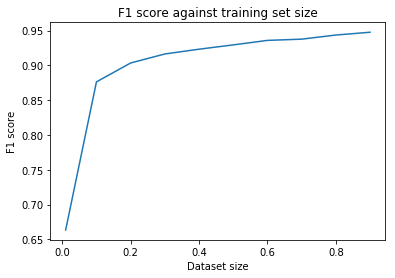

In [155]:
data_set_size = [0.01 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)
score = []
for size in data_set_size:
    print('training with datasize of ' , size)
    X_train_r,__, y_train_r,__ = train_test_split(X_train, y_train, test_size=1-size, random_state=42)
    
    rf = RandomForestClassifier(n_estimators=64 , max_depth=32, max_features=8)
    rf.fit(X_train_r, y_train_r)  
    
    y_pred = rf.predict(X_test)
    score.append(f1_score(y_test, y_pred , average='macro' ))


plt.plot(data_set_size ,score)
plt.ylabel('F1 score')
plt.xlabel('Dataset size')
plt.title('F1 score against training set size')

As we can see our model need at least 20% of the training set to be a little bit effective and the more we increased the size of the dataset the more it is effective. However, a little dataset is enough to obtain good results.

__COMPUTATON TIME__ 

In [206]:
train = data[data.columns[0:30]]
label = data[data.columns[30:38]] 

In [209]:
import time

#Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

begin = time.time()

#Training stage
rf = RandomForestClassifier(n_estimators=64 , max_depth=32, max_features=8 ,n_jobs=-1)
rf.fit(X_train, y_train)  
print('Time to train' , time.time()-begin, 'seconds')

#Testing stage
begin = time.time()
y_pred = rf.predict(X_test)
print('Time to predict' , time.time()-begin , 'seconds')



Time to train 10.741778373718262 seconds
Time to predict 0.8412165641784668 seconds


In [210]:
f1_score(y_test, y_pred , average='macro' )

0.958878856885379

We have a good f1 score with the macro average which is important for anomaly detection however to interpret more our results confusion matrix can be a good tool so we'll do it in the next part.

__COMMENTS ON COMPUTATION TIME__:

So we can see that our model is really fast in the training, and even faster in prediction which is really interesting if we have to make anomaly detection in live time.

__INTERPRETATION OF THE RESULTS__


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

#function from  sklearn to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return (ax)


np.set_printoptions(precision=2)



Confusion matrix, without normalization
[[45951     2]
 [   14   300]]


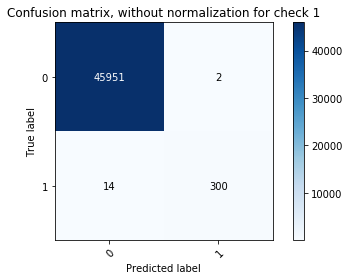

Confusion matrix, without normalization
[[44685    10]
 [   11  1561]]


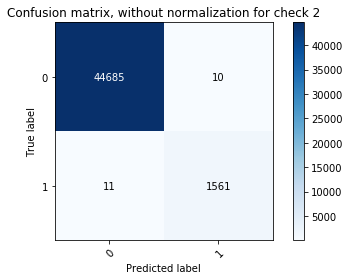

Confusion matrix, without normalization
[[44698    24]
 [   14  1531]]


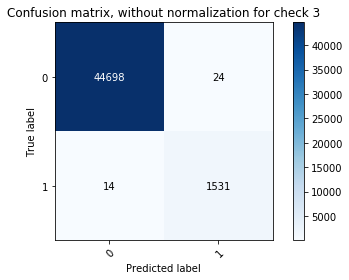

Confusion matrix, without normalization
[[41771    24]
 [   14  4458]]


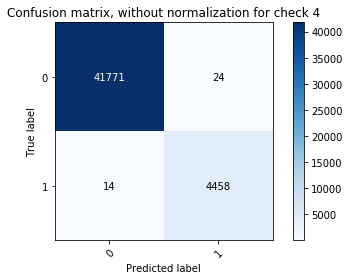

Confusion matrix, without normalization
[[45729     2]
 [    9   527]]


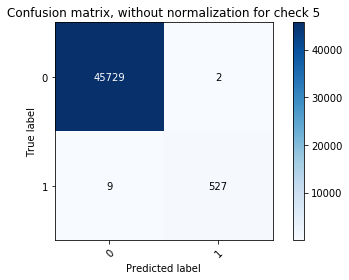

Confusion matrix, without normalization
[[33529    28]
 [   29 12681]]


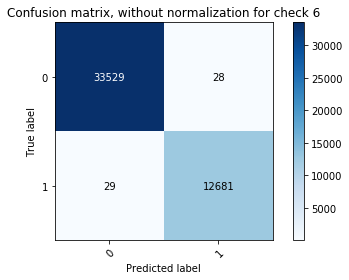

Confusion matrix, without normalization
[[45084   111]
 [  322   750]]


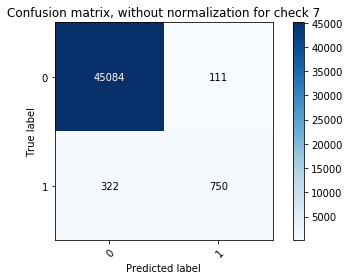

Confusion matrix, without normalization
[[45786     1]
 [   42   438]]


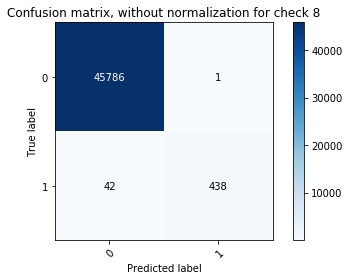

In [205]:
for i in range (0,8):

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(np.array(y_test)[:,i].reshape((np.array(y_test)[:,0].shape[0],1)), np.array(y_pred)[:,i].reshape((np.array(y_test)[:,0].shape[0],1)), 
                          title='Confusion matrix, without normalization for check ' + str(i+1) )


    plt.show()


__COMMENTS ON THE RESULT OF OUR MODEL__


As we are studying anomaly detection it is important to focus on this subject. In anomaly detection what is important is to detect the True Label if reduce the left down side of the confusion matrix (0 predicted but 1 in reality). As we can see, this is important because it is preferable to detect each anomaly even if this imply to detect anomaly that are not in reality.

Here, we can see that we try to reduce this number of this False Negative to be able to detect the most anomaly. Indeed, we manage well even if some anomaly are still not detected. 

<div class="">
    <h3>*. Optional</h3>
</div>

As you will see in the dataset description, the labels you are going to predict have no meaningful names. Try to understand which kind of anomalies these labels refer to and give sensible names. To do it, you could exploit the output of the interpretable models and/or use a statistical approach with the data you have.

<div class="alert alert-danger">
    <b>N.B.</b> Please note that the items listed under each heading are neither exhaustive, nor are you expected to explore every given suggestion.
    Nonetheless, these should serve as a guideline for your work in both this and upcoming challenges.
    As always, you should use your intuition and understanding in order to decide which analysis best suits the assigned task.
</div>

<div class="">
    <h2>Submission Instructions</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;" />    
</div>

- The goal of this challenge is to construct one or more models to detect anomalies.
- Your submission will be the <b>HTML version of your notebook</b> exploring the various modelling aspects described above.

<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Location of the Dataset on zoe
The data for this challenge is located at: `/mnt/datasets/anomaly`

#### * Files

You have a unique csv file with 36 features and 8 labels.
Each record contains aggregate features computed over a given amount of time.

#### * Attributes

A brief outline of the available attributes is given below.

1. <i>SessionNumber</i> (INTEGER): it identifies the session on which data is collected;
* <i>SystemID</i> (INTEGER): it identifies the system generating the data;
* <i>Date</i> (DATE): collection date;
* <i>HighPriorityAlerts</i> (INTEGER [0, N]): number of high priority alerts in the session;
* <i>Dumps</i> (INTEGER [0, N]): number of memory dumps;
* <i>CleanupOOMDumps</i> (INTEGER) [0, N]): number of cleanup OOM dumps;
* <i>CompositeOOMDums</i> (INTEGER [0, N]): number of composite OOM dumps;
* <i>IndexServerRestarts</i> (INTEGER [0, N]): number of restarts of the index server;
* <i>NameServerRestarts</i> (INTEGER [0, N]): number of restarts of the name server;
* <i>XSEngineRestarts</i> (INTEGER [0, N]): number of restarts of the XSEngine;
* <i>PreprocessorRestarts</i> (INTEGER [0, N]): number of restarts of the preprocessor;
* <i>DaemonRestarts</i> (INTEGER [0, N]): number of restarts of the daemon process;
* <i>StatisticsServerRestarts</i> (INTEGER [0, N]): number of restarts of the statistics server;
* <i>CPU</i> (FLOAT [0, 100]): cpu usage;
* <i>PhysMEM</i> (FLOAT [0, 100]): physical memory;
* <i>InstanceMEM</i> (FLOAT [0, 100]): memory usage of one instance of the system;
* <i>TablesAllocation</i> (FLOAT [0, 100]): memory allocated for tables;
* <i>IndexServerAllocationLimit</i> (FLOAT [0, 100]): level of memory used by index server;
* <i>ColumnUnloads</i> (INTEGER [0, N]): number of columns unloaded from the tables;
* <i>DeltaSize</i> (INTEGER [0, N]): size of the delta store;
* <i>MergeErrors</i> BOOLEAN [0, 1]: 1 if there are merge errors;
* <i>BlockingPhaseSec</i> (INTEGER [0, N]): blocking phase duration in seconds;
* <i>Disk</i> (FLOAT [0, 100]): disk usage;
* <i>LargestTableSize</i> (INTEGER [0, N]): size of the largest table;
* <i>LargestPartitionSize</i> (INTEGER [0, N]): size of the largest partition of a table;
* <i>DiagnosisFiles</i> (INTEGER [0, N]): number of diagnosis files;
* <i>DiagnosisFilesSize</i> (INTEGER [0, N]): size of diagnosis files;
* <i>DaysWithSuccessfulDataBackups</i> (INTEGER [0, N]): number of days with successful data backups;
* <i>DaysWithSuccessfulLogBackups</i> (INTEGER [0, N]): number of days with successful log backups;
* <i>DaysWithFailedDataBackups</i> (INTEGER [0, N]): number of days with failed data backups;
* <i>DaysWithFailedfulLogBackups</i> (INTEGER [0, N]): number of days with failed log backups;
* <i>MinDailyNumberOfSuccessfulDataBackups</i> (INTEGER [0, N]): minimum number of successful data backups per day;
* <i>MinDailyNumberOfSuccessfulLogBackups</i> (INTEGER [0, N]): minimum number of successful log backups per day;
* <i>MaxDailyNumberOfFailedDataBackups</i> (INTEGER [0, N]): maximum number of failed data backups per day;
* <i>MaxDailyNumberOfFailedLogBackups</i> (INTEGER [0, N]): maximum number of failed log backups per day;
* <i>LogSegmentChange</i> (INTEGER [0, N]): changes in the number of log segments.

#### * Labels

Labels are binary. Each label refers to a different anomaly.

* <i>Check1</i>;
* <i>Check2</i>;
* <i>Check3</i>;
* <i>Check4</i>;
* <i>Check5</i>;
* <i>Check6</i>;
* <i>Check7</i>;
* <i>Check8</i>;

https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706 [1]
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html [2]

https://github.com/imoscovitz/wittgenstein [3]

https://github.com/imoscovitz/wittgenstein [4]

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html [5]

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html [6]

https://www.tensorflow.org/tutorials/keras/basic_classification [7]

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html [8]